In [87]:
import numpy as np
import matplotlib.pyplot as plt
import time

import gatemon

In [88]:
res_array = np.arange(6, 100, 2)

E0 = []
E1 = []
E2 = []
E3 = []
t = []

for i in range(len(res_array)):
    t0 = time.time()
    q = gatemon.Qubit(res_array[i], 0.01, 0.91, 0.0) #parameters (n, EC, t, ng)
    q.model='averin'
    q.spect()
    t1 = time.time()
    t.append(t1-t0)
    energies = q.getEigvals()

    E0.append(energies[0])
    E1.append(energies[1])
    E2.append(energies[2])
    E3.append(energies[3])


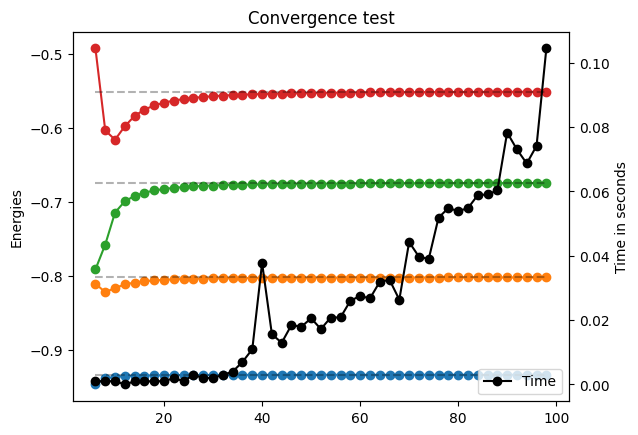

In [89]:
fig, ax1 = plt.subplots()

ax1.plot(res_array, E0, '-o')
ax1.plot([res_array[0], res_array[-1]], [E0[-1], E0[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E1, '-o')
ax1.plot([res_array[0], res_array[-1]], [E1[-1], E1[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E2, '-o')
ax1.plot([res_array[0], res_array[-1]], [E2[-1], E2[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E3, '-o')
ax1.plot([res_array[0], res_array[-1]], [E3[-1], E3[-1]], '--', color="black", alpha=0.3)
ax1.set(ylabel = "Energies", title = "Convergence test")

ax2 = ax1.twinx()

ax2.plot(res_array, t, '-o', color = "black", label = "Time")
ax2.set(ylabel="Time in seconds")
ax2.legend(loc = "lower right")

So from this we can see that even a resolution of around 50 is plenty to get a consistent result for the eigenvalues